In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Ads_CTR_Optimisation.csv')

Implementing UCB

In [0]:
import math
N = 10000
d = 10
ads_selected= []
numbers_of_selections= [0] * d
sums_of_rewards= [0] * d
total_reward= 0

In [0]:
for n in range(0, N):
  ad = 0
  max_upper_bound= 0
for i in range(0, d):
  if (numbers_of_selections[i] > 0):
    average_reward= sums_of_rewards[i] / numbers_of_selections[i]
    delta_i= math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
    upper_bound= average_reward+ delta_i
  else:
    upper_bound= 1e400
if upper_bound> max_upper_bound:
  max_upper_bound= upper_bound
  ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward= total_reward+ reward

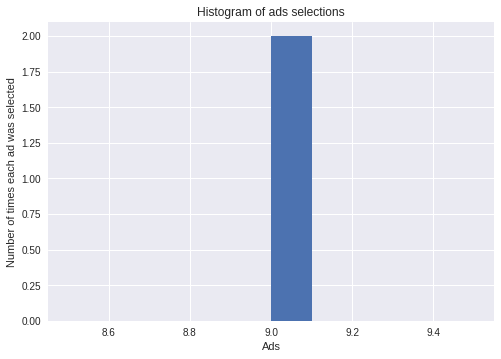

In [17]:
# Visualisingthe results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()